## Regresion Lineal

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from scipy.stats import pearsonr
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("data.csv")
data

,metro,precio
0,5,375
1,15,487
2,20,450
3,25,500


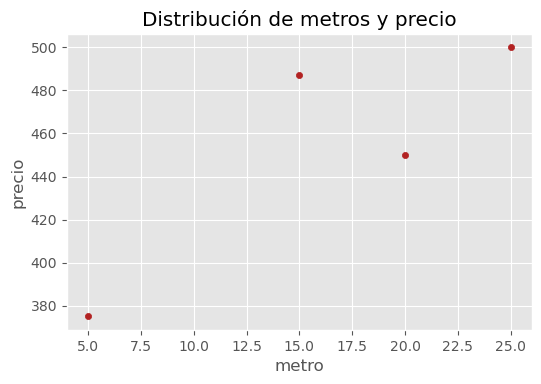

In [3]:
fig, ax = plt.subplots(figsize=(6, 3.84))

data.plot(
    x    = 'metro',
    y    = 'precio',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribución de metros y precio');

In [4]:
corr_test = pearsonr(x = data['metro'], y =  data['precio'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.8586047206240953
P-value:  0.1413952793759048


In [5]:
X = data[['metro']]
y = data['precio']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [6]:
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                 -0.874
Method:                 Least Squares   F-statistic:                   0.06698
Date:                Sun, 17 Sep 2023   Prob (F-statistic):              0.839
Time:                        13:16:13   Log-Likelihood:                -13.319
No. Observations:                   3   AIC:                             30.64
Df Residuals:                       1   BIC:                             28.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        453.0000    102.530      4.418      0.1

In [7]:
modelo.conf_int(alpha=0.05)

array([[-849.77331218, 1755.77331218],
       [ -62.52259731,   65.12259731]])

In [8]:
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,472.5,32.422986,60.526906,884.473094,-138.554847,1083.554847
1,479.0,20.506097,218.445338,739.554662,-42.109325,1000.109325
2,485.5,32.422986,73.526906,897.473094,-125.554847,1096.554847


In [9]:
regresion = linear_model.LinearRegression()

In [10]:
metro = data["metro"].values.reshape((-1,1))
model = regresion.fit(metro, data["precio"])

print("Interseccion (b)", model.intercept_)
print("Pendiente (m)", model.coef_)

Interseccion (b) 361.25714285714287
Pendiente (m) [5.64571429]


In [11]:
entrada= [[5],[10],[15],[20],[25]]
prediccion = model.predict(entrada)
print(prediccion)

[389.48571429 417.71428571 445.94285714 474.17142857 502.4       ]


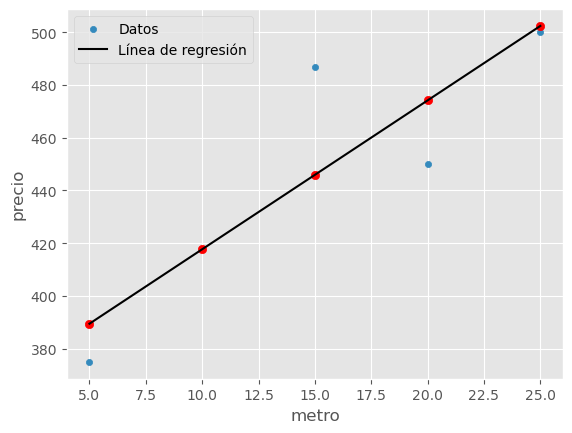

In [12]:
data.plot.scatter(x="metro", y="precio", label='Datos')
plt.scatter(entrada, prediccion, color='red')
plt.plot(entrada, prediccion, color='black', label='Línea de regresión')
plt.xlabel('metro')
plt.ylabel('precio')
plt.legend()
plt.show()